In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('sigma_cabs.csv')
df.shape

(131662, 14)

In [3]:
# Занесем индекс колонку
df = df.set_index('Trip_ID')
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


Описание признаков:

1. **Trip_ID**: ID for TRIP
2. **Trip_Distance**: The distance for the trip requested by the customer
3. **TypeofCab**: Category of the cab requested by the customer
4. **CustomerSinceMonths**: Customer using cab services since n months; 0 month means current month
5. **LifeStyleIndex**: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
6. **ConfidenceLifeStyle_Index**: Category showing confidence on the index mentioned above
7. **Destination_Type**: Sigma Cabs divides any destination in one of the 14 categories.
8. **Customer_Rating**: Average of life time ratings of the customer till date
9. **CancellationLast1Month**: Number of trips cancelled by the customer in last 1 month
10. **Var1**, **Var2** and **Var3**: Continuous variables masked by the company. Can be used for modelling purposes
11. **Gender**: Gender of the customer

**SurgePricingType**: Target (can be of 3 types)


### EDA 

In [4]:
### Your code is here
numeric_columns = df.loc[:, df.dtypes!='object'].columns
df[numeric_columns]

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Trip_ID,,,,,,,,,
T0005689460,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2
T0005689461,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2
T0005689464,41.58,10.0,NaN,3.50125,2,NaN,56,77,2
T0005689465,61.56,10.0,NaN,3.45375,0,NaN,52,74,3
T0005689467,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2
...,...,...,...,...,...,...,...,...,...
T0005908509,11.72,1.0,2.74229,3.28500,0,61.0,47,76,3
T0005908510,74.81,7.0,2.81059,0.44500,0,NaN,63,88,2
T0005908512,40.17,10.0,2.99565,3.33625,0,NaN,48,75,2


In [5]:
num_cols = df.select_dtypes(exclude='object').columns

In [6]:
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)

In [7]:
category_columns = df.loc[:,df.dtypes=='object'].columns
df[category_columns]

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender
Trip_ID,,,,
T0005689460,B,A,A,Female
T0005689461,B,B,A,Male
T0005689464,NaN,NaN,E,Male
T0005689465,C,NaN,A,Male
T0005689467,C,B,A,Male
...,...,...,...,...
T0005908509,D,A,A,Male
T0005908510,C,C,A,Male
T0005908512,C,B,A,Female


In [8]:
for col in category_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [9]:
df.isnull().sum()

Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [10]:
df[numeric_columns].corr()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Trip_Distance,1.000000,0.114413,0.468332,-0.054654,-0.007686,-0.031388,0.200456,0.231706,0.135928
Customer_Since_Months,0.114413,1.000000,0.119279,-0.048969,-0.006180,-0.000977,0.041814,0.110851,0.027194
Life_Style_Index,0.468332,0.119279,1.000000,0.189165,0.068188,-0.045710,0.215944,0.303324,-0.073692
Customer_Rating,-0.054654,-0.048969,0.189165,1.000000,0.003595,-0.005398,-0.302968,-0.227531,-0.155279
Cancellation_Last_1Month,-0.007686,-0.006180,0.068188,0.003595,1.000000,0.011711,0.095830,0.128686,0.185646
Var1,-0.031388,-0.000977,-0.045710,-0.005398,0.011711,1.000000,-0.025133,-0.020892,-0.013754
Var2,0.200456,0.041814,0.215944,-0.302968,0.095830,-0.025133,1.000000,0.683437,0.003437
Var3,0.231706,0.110851,0.303324,-0.227531,0.128686,-0.020892,0.683437,1.000000,-0.039309
Surge_Pricing_Type,0.135928,0.027194,-0.073692,-0.155279,0.185646,-0.013754,0.003437,-0.039309,1.000000


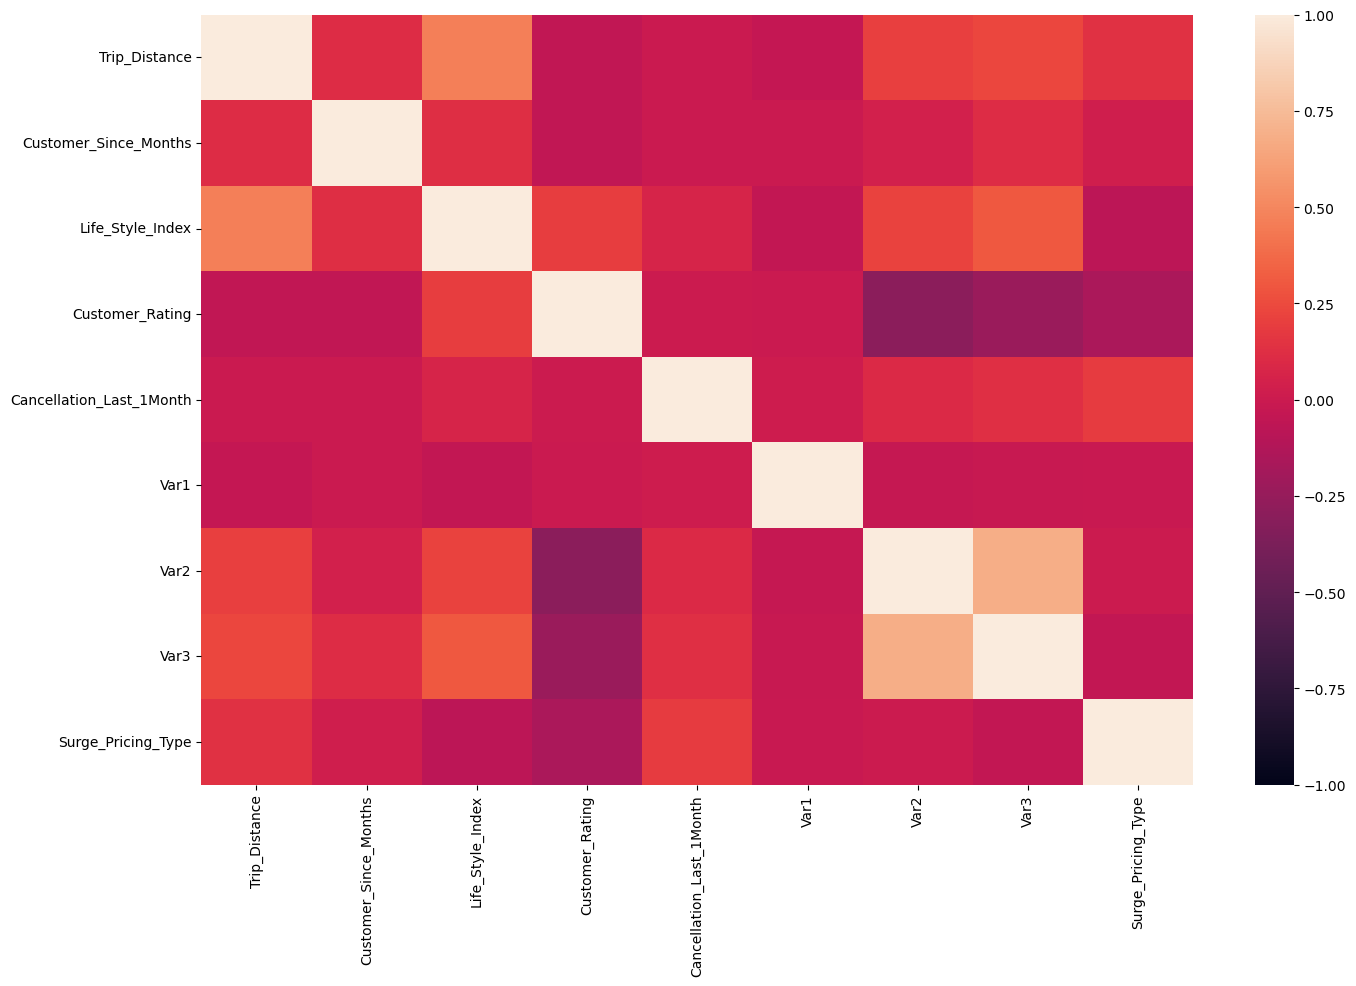

In [11]:
fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(df[numeric_columns].corr(),
           xticklabels=numeric_columns,
           yticklabels=numeric_columns,
           vmin=-1,
           vmax=1)

plt.show()

In [12]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 5))

Top Absolute Correlations
Var2              Var3                0.683437
Trip_Distance     Life_Style_Index    0.468332
Life_Style_Index  Var3                0.303324
Customer_Rating   Var2                0.302968
Trip_Distance     Var3                0.231706
dtype: float64


In [13]:
df.isnull().sum()

Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [14]:
df_category_dum = pd.get_dummies(df[category_columns], drop_first=True)
df.drop(columns=category_columns, inplace=True)
df = pd.concat([df, df_category_dum], axis=1)

In [15]:
df

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
Trip_ID,,,,,,,,,,,,,,,,,,,,,
T0005689460,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
T0005689461,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
T0005689464,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
T0005689465,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
T0005689467,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T0005908509,11.72,1.0,2.74229,3.28500,0,61.0,47,76,3,0,...,0,0,0,0,0,0,0,0,0,1
T0005908510,74.81,7.0,2.81059,0.44500,0,61.0,63,88,2,0,...,0,0,0,0,0,0,0,0,0,1
T0005908512,40.17,10.0,2.99565,3.33625,0,61.0,48,75,2,0,...,0,0,0,0,0,0,0,0,0,0


### Training

In [16]:
np.random.seed(2022)

from sklearn.pipeline import Pipeline


from sklearn.model_selection import train_test_split

X = df.drop(columns='Surge_Pricing_Type')
y = df['Surge_Pricing_Type']

In [17]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('one_vs_all', OneVsRestClassifier(LogisticRegression()))
])

pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_all',
                 OneVsRestClassifier(estimator=LogisticRegression()))])

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.723     0.542     0.619      5372
           2      0.636     0.834     0.722     11349
           3      0.741     0.571     0.645      9612

    accuracy                          0.679     26333
   macro avg      0.700     0.649     0.662     26333
weighted avg      0.692     0.679     0.673     26333



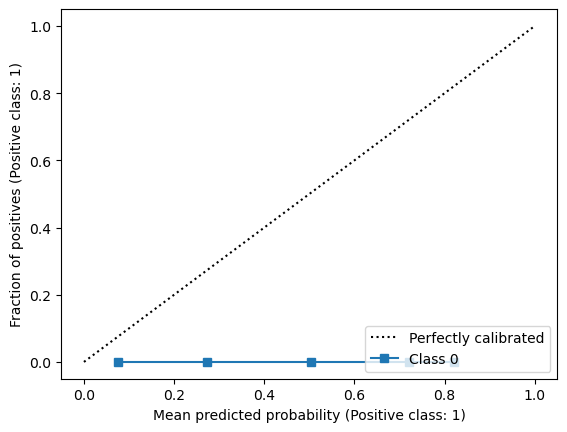

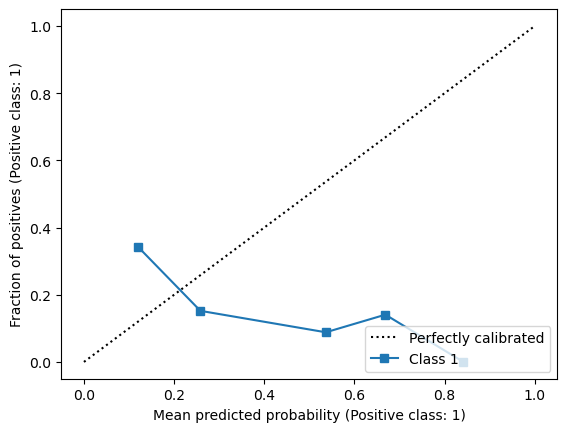

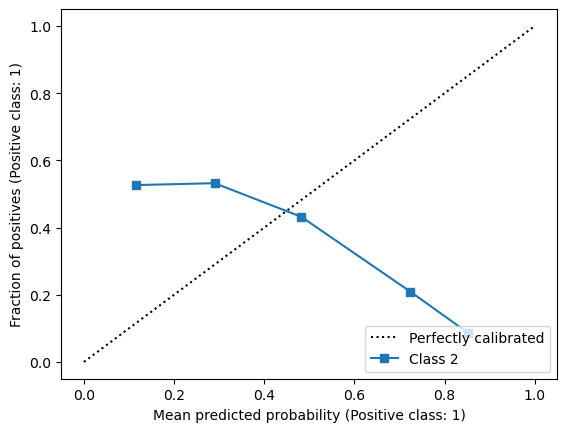

In [20]:
from sklearn.calibration import CalibrationDisplay

y_prob = pipe.predict_proba(X_test)

for i in range(y_prob.shape[1]):
    CalibrationDisplay.from_predictions(y_test==i, y_prob[:,i], name=f"Class {i}")

In [21]:
param_grid = {'one_vs_all__estimator__penalty': ['l1', 'l2', 'elasticnet'],
              'one_vs_all__estimator__C': [0.001, 0.01, 0.1, 1]}

In [22]:
### Your code is here
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

search.fit(X_train, y_train)

print("Best parameters:", search.best_params_)

best_model = search.best_estimator_

prediction = best_model.predict(X_test)

print(classification_report(y_test, prediction, digits=3))

Best parameters: {'one_vs_all__estimator__C': 0.001, 'one_vs_all__estimator__penalty': 'l2'}
              precision    recall  f1-score   support

           1      0.742     0.534     0.621      5372
           2      0.635     0.839     0.723     11349
           3      0.742     0.576     0.649      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.664     26333
weighted avg      0.696     0.681     0.675     26333



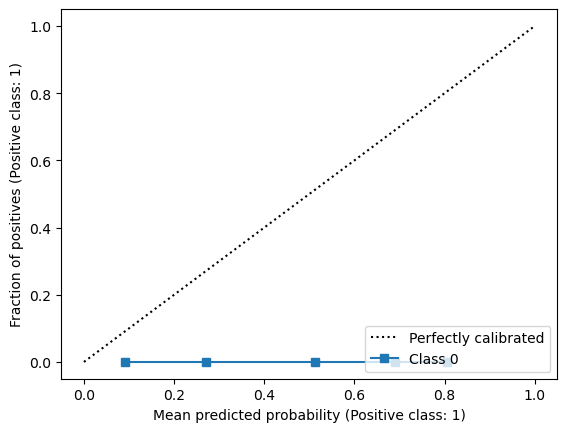

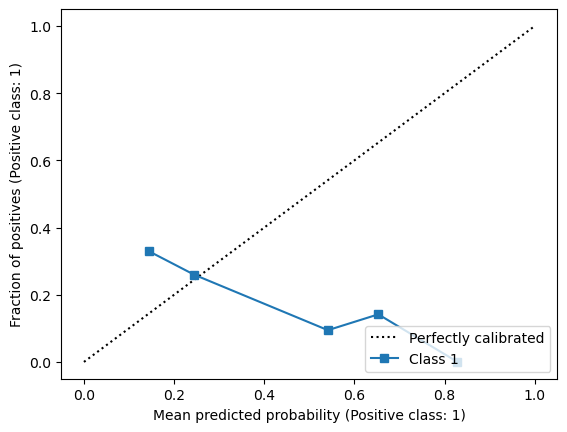

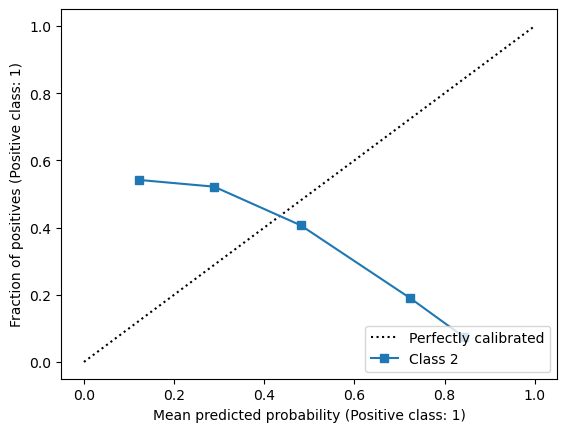

In [23]:
### Your code is here
y_prob = search.predict_proba(X_test)

for i in range(y_prob.shape[1]):
    CalibrationDisplay.from_predictions(y_test==i, y_prob[:,i], name=f"Class {i}")

In [24]:
### Создание полиномиальных признаков

### Your code is here

X_polinomial = X.copy()

for col in num_cols.drop('Surge_Pricing_Type'):
    data_part = pd.concat([X[col]**(1+i) for i in range(4)], axis=1)
    data_part.columns = [col + f"_power_{i+1}" for i in range(4)]
    
    X_polinomial = X_polinomial.drop(col, axis=1)
    X_polinomial = pd.concat((X_polinomial, data_part), axis=1)
    
X_polinomial.shape

(131662, 52)

In [25]:
X_polinomial.head()

,Type_of_Cab_B,Type_of_Cab_C,Type_of_Cab_D,Type_of_Cab_E,Confidence_Life_Style_Index_B,Confidence_Life_Style_Index_C,Destination_Type_B,Destination_Type_C,Destination_Type_D,Destination_Type_E,...,Var1_power_3,Var1_power_4,Var2_power_1,Var2_power_2,Var2_power_3,Var2_power_4,Var3_power_1,Var3_power_2,Var3_power_3,Var3_power_4
Trip_ID,,,,,,,,,,,,,,,,,,,,,
T0005689460,1,0,0,0,0,0,0,0,0,0,...,64000.0,2560000.0,46,2116,97336,4477456,60,3600,216000,12960000
T0005689461,1,0,0,0,1,0,0,0,0,0,...,54872.0,2085136.0,56,3136,175616,9834496,78,6084,474552,37015056
T0005689464,1,0,0,0,1,0,0,0,0,1,...,226981.0,13845841.0,56,3136,175616,9834496,77,5929,456533,35153041
T0005689465,0,1,0,0,1,0,0,0,0,0,...,226981.0,13845841.0,52,2704,140608,7311616,74,5476,405224,29986576
T0005689467,0,1,0,0,1,0,0,0,0,0,...,132651.0,6765201.0,49,2401,117649,5764801,102,10404,1061208,108243216


In [26]:
X_pol_train, X_pol_test, y_train, y_test  = train_test_split(X_polinomial, y, 
                                                             test_size=0.2, 
                                                             shuffle=True, 
                                                             random_state=2022)

In [27]:
### Your code is here
best_model.fit(X_pol_train, y_train)
prediction = best_model.predict(X_pol_test)

print(classification_report(y_test, prediction, digits=3))

              precision    recall  f1-score   support

           1      0.748     0.532     0.622      5372
           2      0.636     0.837     0.723     11349
           3      0.741     0.584     0.653      9612

    accuracy                          0.682     26333
   macro avg      0.708     0.651     0.666     26333
weighted avg      0.697     0.682     0.677     26333



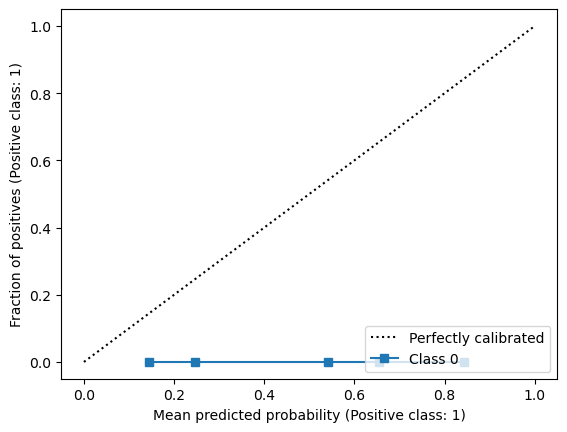

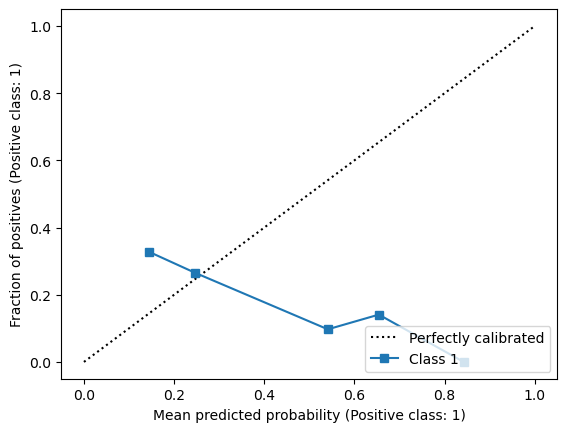

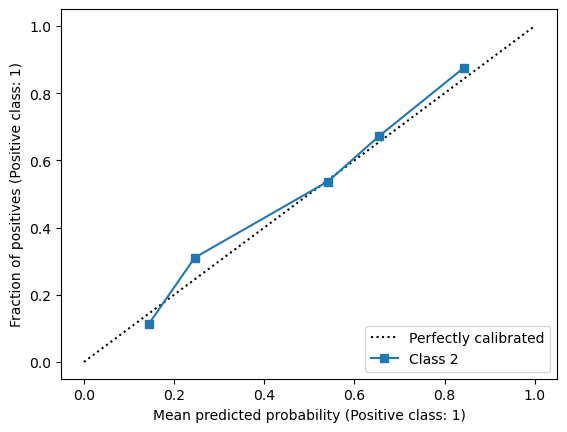

In [28]:
### Your code is here

y_prob_best = best_model.predict_proba(X_pol_test)

for i in range(y_prob_best.shape[1]):
    CalibrationDisplay.from_predictions(y_test==i, y_prob_best[:,1], name=f"Class {i}")

In [35]:
X = df.drop(columns='Surge_Pricing_Type')
y = df['Surge_Pricing_Type']

In [50]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

In [52]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

### Your code is here
pipe_one_one = Pipeline([("scaler", StandardScaler()),
                         ("one_vs_one", OneVsOneClassifier(SGDClassifier()))])

pipe_one_one.fit(X_train, y_train)

print(classification_report(y_test, pipe_one_one.predict(X_test), digits=3))




              precision    recall  f1-score   support

           1      0.742     0.529     0.618      5405
           2      0.629     0.868     0.729     11385
           3      0.756     0.537     0.628      9543

    accuracy                          0.678     26333
   macro avg      0.709     0.645     0.658     26333
weighted avg      0.698     0.678     0.670     26333



In [47]:
param_grid = {'one_vs_one__estimator__loss': ['hinge', 'log', 'modified_huber'],
              'one_vs_one__estimator__penalty': ['l1', 'l2'],
              'one_vs_one__estimator__alpha': [0.001, 0.01, 0.1]}

In [49]:
### Your code is here

search = GridSearchCV(pipe_one_one, param_grid)

search.fit(X_train, y_train)

print(f'Best params: {search.best_params_}')

best_model = search.best_estimator_

print(classification_report(y_test, best_model.predict(X_test), digits=3))

Best params: {'one_vs_one__estimator__alpha': 0.1, 'one_vs_one__estimator__loss': 'hinge', 'one_vs_one__estimator__penalty': 'l2'}
              precision    recall  f1-score   support

           1      0.756     0.517     0.614      5372
           2      0.625     0.876     0.730     11349
           3      0.762     0.535     0.628      9612

    accuracy                          0.678     26333
   macro avg      0.714     0.643     0.657     26333
weighted avg      0.702     0.678     0.669     26333

